In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import joblib


In [2]:
df = pd.read_csv("1_holistic_health_lifestyle_dataset.csv")
df.head()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status
0,54.934283,5.643011,5.696572,0.000000,6.292214,2.578565,24.275932,4.280610,8.984006,36.950187,Poor
1,42.234714,6.389001,5.566647,4.450144,8.519054,2.448713,25.970141,7.461846,3.223304,55.167774,Average
2,57.953771,5.805238,3.126960,9.129716,6.702720,3.261433,25.193857,0.000000,4.600482,78.304426,Good
3,75.460597,7.220836,6.159168,16.496689,7.135854,3.726265,19.527300,9.958423,3.947706,94.018274,Good
4,40.316933,9.394357,2.019835,25.241623,8.076086,3.049478,23.348229,4.320347,8.084322,100.000000,Good


Step 1: Data Understanding
i. Dataframe Shape
ii. info
iii. describe
iv. columns

In [3]:
df.shape

(10000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Physical_Activity     10000 non-null  float64
 1   Nutrition_Score       10000 non-null  float64
 2   Stress_Level          10000 non-null  float64
 3   Mindfulness           10000 non-null  float64
 4   Sleep_Hours           10000 non-null  float64
 5   Hydration             10000 non-null  float64
 6   BMI                   10000 non-null  float64
 7   Alcohol               10000 non-null  float64
 8   Smoking               10000 non-null  float64
 9   Overall_Health_Score  10000 non-null  float64
 10  Health_Status         10000 non-null  object 
dtypes: float64(10), object(1)
memory usage: 859.5+ KB


In [5]:
df.describe()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.047069,6.966599,4.987202,15.224636,7.000194,2.503302,24.095086,3.523663,5.706911,78.227945
std,19.832871,1.883295,1.938195,9.454891,1.468580,0.801660,3.356663,3.270784,5.000260,19.697853
min,0.000000,0.000000,1.000000,0.000000,3.000000,0.500000,18.000000,0.000000,0.000000,2.217088
25%,31.548189,5.675978,3.599696,8.053871,6.003898,1.958461,21.653393,0.298894,1.065818,64.627060
50%,44.948100,7.031693,4.988464,14.896178,7.014341,2.506579,24.072122,2.980658,4.954994,81.118118
75%,58.421618,8.387730,6.327795,21.790305,8.025752,3.052666,26.380536,5.706382,8.991626,97.972163
max,120.000000,10.000000,10.000000,52.278333,10.000000,5.000000,36.376168,18.040621,27.978693,100.000000


In [6]:
df.columns

Index(['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness',
       'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking',
       'Overall_Health_Score', 'Health_Status'],
      dtype='object')

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df.isna().sum()

Physical_Activity       0
Nutrition_Score         0
Stress_Level            0
Mindfulness             0
Sleep_Hours             0
Hydration               0
BMI                     0
Alcohol                 0
Smoking                 0
Overall_Health_Score    0
Health_Status           0
dtype: int64

step 2: Data cleaning

 ✔ Encoding categorical columns
 ✔ Detecting anomalies

i. Converting categorical columns to numerical columns

step1: identify categorical columns

ii. Defining Outliers

In [ ]:
# 6. DETECT ANOMALIES (OUTLIERS)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

print("\nChecking Outliers:")
for c in num_cols:
    outliers = detect_outliers(c)
    print(f"{c}: {len(outliers)} outliers")


Checking Outliers:
Physical_Activity: 40 outliers
Nutrition_Score: 48 outliers
Stress_Level: 0 outliers
Mindfulness: 28 outliers
Sleep_Hours: 0 outliers
Hydration: 25 outliers
BMI: 35 outliers
Alcohol: 35 outliers
Smoking: 47 outliers
Overall_Health_Score: 25 outliers


iii. visualization of outliers

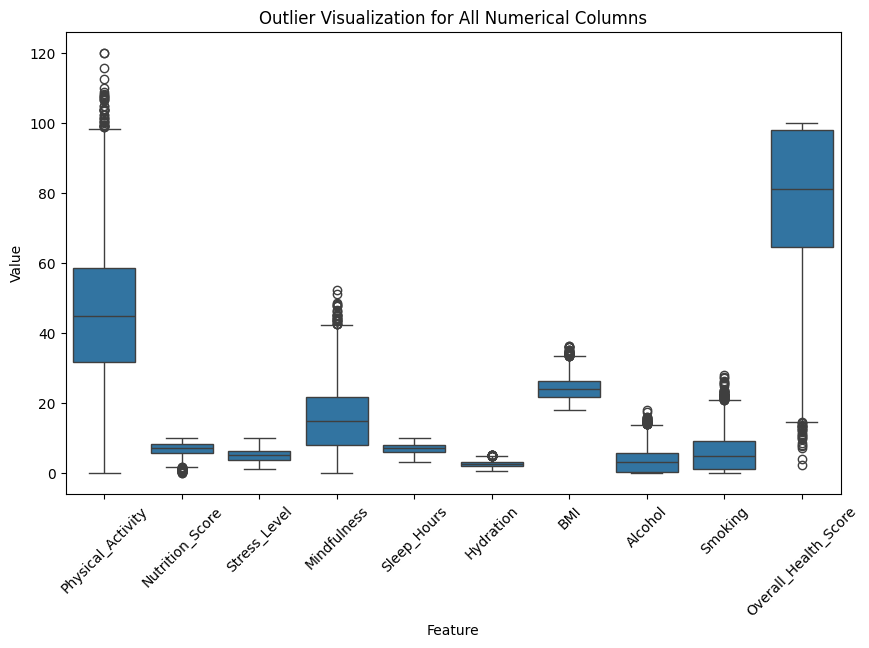

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

df_melt = num_cols.melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melt, x="Feature", y="Value")
plt.xticks(rotation=45)
plt.title("Outlier Visualization for All Numerical Columns")
plt.show()



In [12]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

    
clean_df = df.copy()

for col in clean_df.select_dtypes(include=['int64', 'float64']).columns:
    lower, upper = detect_outliers(clean_df, col)
    clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]

print("Before removing outliers: ", len(df))
print("after removing outliers: ", len(clean_df))
print("ouliers: ", len(df) - len(clean_df))



Before removing outliers:  10000
after removing outliers:  9725
ouliers:  275


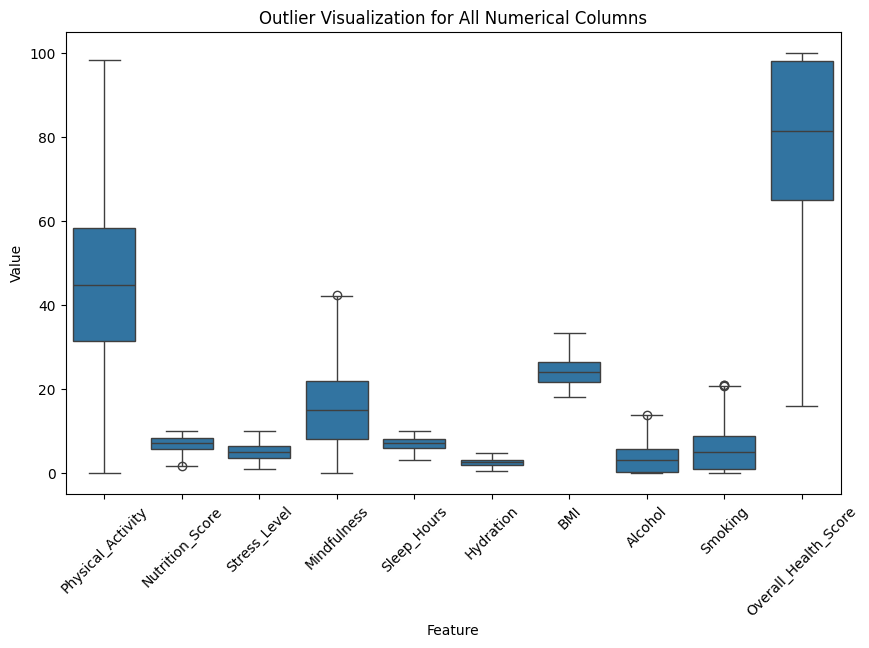

In [13]:
num_cols = clean_df.select_dtypes(include=['int64', 'float64'])

df_melt = num_cols.melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melt, x="Feature", y="Value")
plt.xticks(rotation=45)
plt.title("Outlier Visualization for All Numerical Columns")
plt.show()

In [14]:
num_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return clean_df[(clean_df[col] < lower) | (clean_df[col] > upper)]

print("\nChecking Outliers:")
for c in num_cols:
    outliers = detect_outliers(c)
    print(f"{c}: {len(outliers)} outliers")


Checking Outliers:
Physical_Activity: 0 outliers
Nutrition_Score: 0 outliers
Stress_Level: 0 outliers
Mindfulness: 0 outliers
Sleep_Hours: 0 outliers
Hydration: 0 outliers
BMI: 0 outliers
Alcohol: 1 outliers
Smoking: 0 outliers
Overall_Health_Score: 0 outliers


Checking Incorrect Data types

In [15]:

print(clean_df.dtypes)

Physical_Activity       float64
Nutrition_Score         float64
Stress_Level            float64
Mindfulness             float64
Sleep_Hours             float64
Hydration               float64
BMI                     float64
Alcohol                 float64
Smoking                 float64
Overall_Health_Score    float64
Health_Status            object
dtype: object


In [16]:
df_cat = clean_df.select_dtypes(np.object_)
df_cat

,Health_Status
0,Poor
1,Average
2,Good
3,Good
4,Good
...,...
9995,Good
9996,Good
9997,Good
9998,Good


In [18]:
new_df = pd.get_dummies(clean_df, columns=["Health_Status"], drop_first=True)
print("\nFinal dataset shape:", new_df.shape)
new_df.head()


Final dataset shape: (9725, 12)


,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status_Good,Health_Status_Poor
0,54.934283,5.643011,5.696572,0.000000,6.292214,2.578565,24.275932,4.280610,8.984006,36.950187,False,True
1,42.234714,6.389001,5.566647,4.450144,8.519054,2.448713,25.970141,7.461846,3.223304,55.167774,False,False
2,57.953771,5.805238,3.126960,9.129716,6.702720,3.261433,25.193857,0.000000,4.600482,78.304426,True,False
3,75.460597,7.220836,6.159168,16.496689,7.135854,3.726265,19.527300,9.958423,3.947706,94.018274,True,False
4,40.316933,9.394357,2.019835,25.241623,8.076086,3.049478,23.348229,4.320347,8.084322,100.000000,True,False


Standardization

In [19]:
numeric_cols = ["Physical_Activity",	"Nutrition_Score",	"Stress_Level",	"Mindfulness",	"Sleep_Hours",	"Hydration",	"BMI",	"Alcohol",	"Smoking",	"Overall_Health_Score"]
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(df[['Overall_Health_Score']])
new_df.head()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status_Good,Health_Status_Poor
0,54.934283,5.643011,5.696572,0.000000,6.292214,2.578565,24.275932,4.280610,8.984006,36.950187,False,True
1,42.234714,6.389001,5.566647,4.450144,8.519054,2.448713,25.970141,7.461846,3.223304,55.167774,False,False
2,57.953771,5.805238,3.126960,9.129716,6.702720,3.261433,25.193857,0.000000,4.600482,78.304426,True,False
3,75.460597,7.220836,6.159168,16.496689,7.135854,3.726265,19.527300,9.958423,3.947706,94.018274,True,False
4,40.316933,9.394357,2.019835,25.241623,8.076086,3.049478,23.348229,4.320347,8.084322,100.000000,True,False


In [20]:
new_df.to_csv("2_Cleaned_dataset.csv", index = False)

Exploratory Data Analysis (EDA).

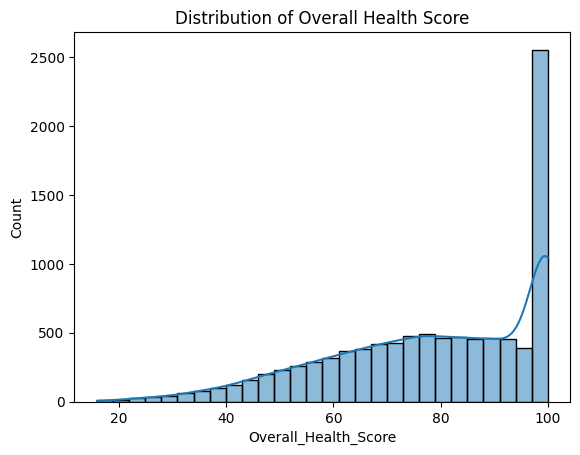

In [21]:
sns.histplot(new_df['Overall_Health_Score'], kde=True)
plt.title("Distribution of Overall Health Score")
plt.show()

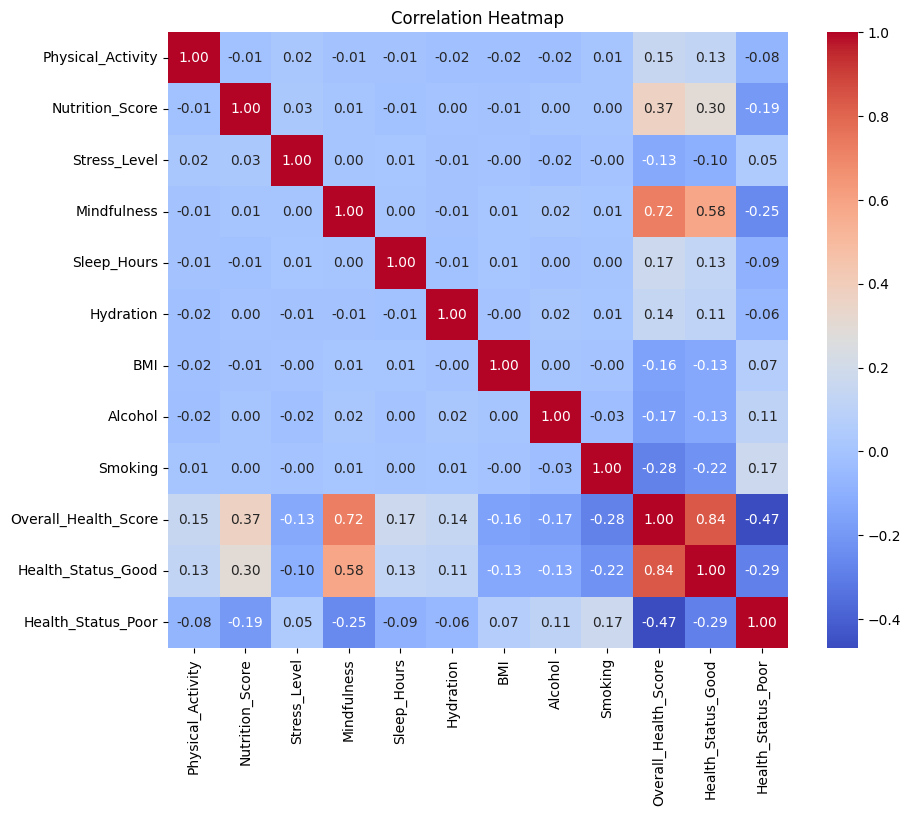

In [ ]:
# Compute correlation matrix
corr_matrix = new_df.corr() 

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Build Regression Models

1.Linear Regression

In [22]:
# Target variable
y = new_df['Overall_Health_Score']

# Features (drop target only)
X = new_df.drop(['Overall_Health_Score'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

Evaluate Linear Regression Model with R²

In [26]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rf_mse = mean_squared_error(y_test, y_pred_lr)
    print(f"{name} Performance: ")
    print("R² Score:", r2)
    print("Random Forest MSE:", rf_mse)

print(evaluate_model("Linear Regression", y_test, y_pred_lr))

Linear Regression Performance: 
R² Score: 0.9443239846345394
Random Forest MSE: 20.291865551310558
None


2: Lasso Regressor

In [27]:
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

Evaluate Lasso Regressor Model with R²

In [28]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rf_mse = mean_squared_error(y_test, y_pred_ls)
    
    print(f"{name} Performance: ")
    print("R² Score:", r2)  
    print("Random Forest MSE:", rf_mse)
evaluate_model("Lasso Regressor", y_test, y_pred_ls)

Lasso Regressor Performance: 
R² Score: 0.9431815689726412
Random Forest MSE: 20.70823415927906


4 : Random Forest Regressior

In [29]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [31]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
  
    
    print(f"{name} Performance")
    print("R² Score:", r2)
    print("Random Forest MSE:", mse)

evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

Random Forest Regressor Performance
R² Score: 0.9262736123591611
Random Forest MSE: 26.87056420563819


The best fitted model is Random Forest Regression Model

Check Residuals before feature Engineering

Residuals are the differences between actual and predicted values. Check if they are randomly distributed (assumption of linear regression).Helps check if the model assumptions are valid

i. checking resuduals of linear regression

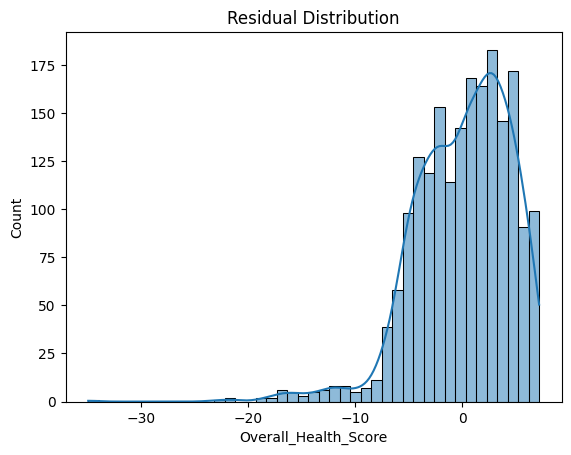

In [32]:
y_pred = lr.predict(X_test)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()



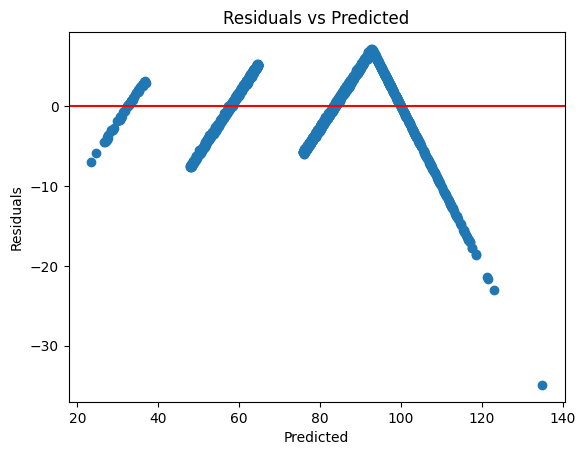

In [33]:
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


ii. checking resuduals of Lasso Regression

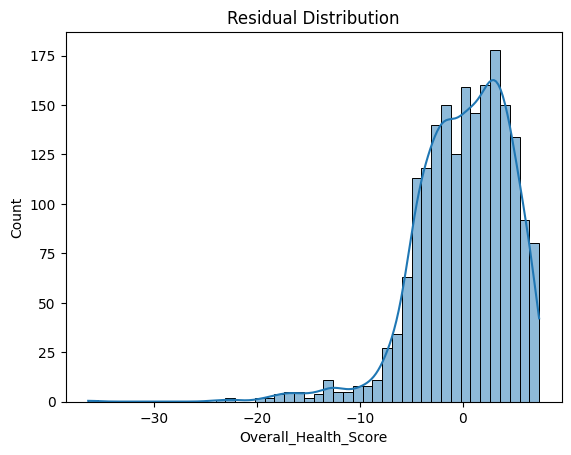

In [34]:
y_pred = ls.predict(X_test)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


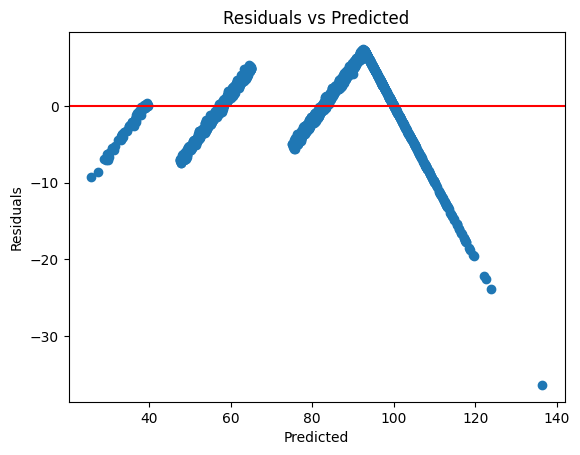

In [35]:
plt.scatter(y_pred_ls, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

iii. checking resuduals of Random Forest Reggression

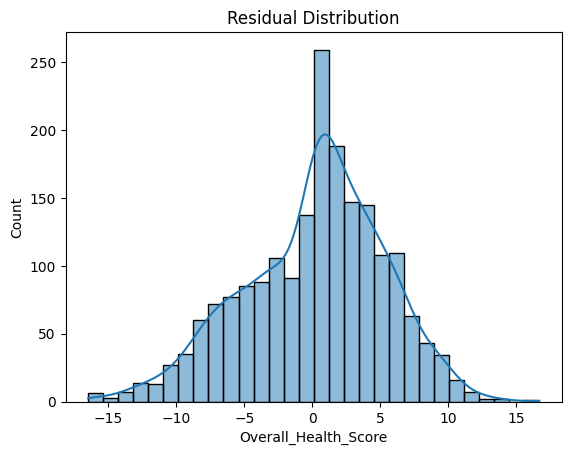

In [36]:
y_pred = rf.predict(X_test)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


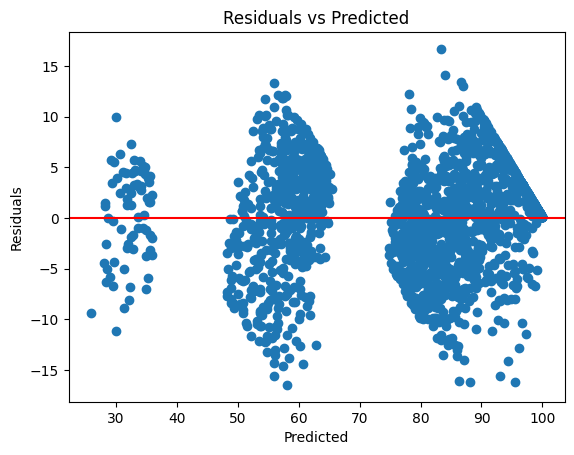

In [37]:
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Check Feature Importance

               Feature  Importance
9   Health_Status_Good    0.731933
3          Mindfulness    0.084706
10  Health_Status_Poor    0.058370
1      Nutrition_Score    0.035668
8              Smoking    0.024141
7              Alcohol    0.013043
4          Sleep_Hours    0.012711
6                  BMI    0.011184
2         Stress_Level    0.010053
0    Physical_Activity    0.009316
5            Hydration    0.008874


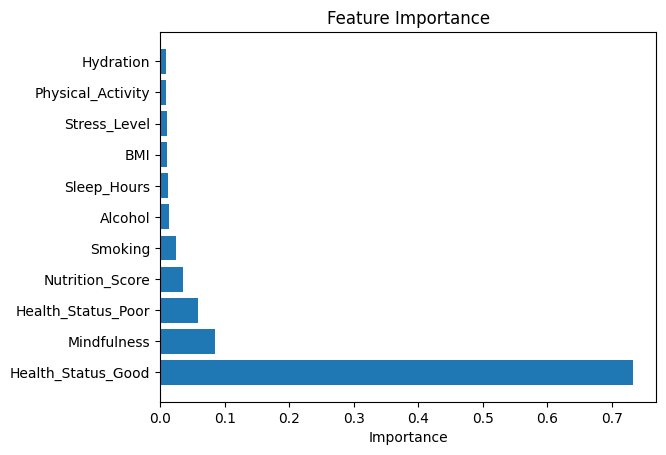

In [38]:
importances = rf.feature_importances_
features = X_train.columns

# Create a dataframe
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
print(feat_df)

# Optional: plot
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [39]:
joblib.dump(rf, "random_forest_health_model.pkl")


['random_forest_health_model.pkl']

In [48]:
# Load the saved model
rf = joblib.load("random_forest_health_model.pkl")

# New data (example)
new_data = pd.DataFrame({
    'Physical_Activity': [3, 5],
    'Nutrition_Score': [80, 65],
    'Stress_Level': [2, 5],
    'Mindfulness': [5, 3],
    'Sleep_Hours': [7, 6],
    'Hydration': [2, 3],
    'BMI': [22, 27],
    'Alcohol': [0, 1],
    'Smoking': [0, 1],
    'Health_Status_Good': [1, 0],
    'Health_Status_Poor': [0, 1]
})

predicted_scores = rf.predict(new_data)


print("Predicted Overall Health Scores:",predicted_scores)

Predicted Overall Health Scores: [82.16179388 34.86749663]


In [47]:
def health_category(score):
    if score >= 75:
        return "Excellent"
    elif score >= 50:
        return "Moderate"
    else:
        return "Poor"

predicted_categories = [health_category(score) for score in predicted_scores]

print(predicted_categories)


['Excellent', 'Poor']
